## 이번 강의 목표 

* 분류문제에 대한 결정트리 분류기, 회귀문제에 대한 결정트리 예측기의 학습 알고리즘을 이해  
> * 결정트리를 생성하는 것은 주어진 특성공간을 분할하는 것과 같음  
$$ $$
> * 각 샘플에 대한 손실함수를 이용하여 훈련 데이터셋에 대한 손실을 정의하고, 적절하게 최소화시키는 과정이 결정트리를 생성하는 과정 
>> * 회귀의 경우 훈련 데이터셋에 대한 손실은 MSE를 주로 사용  
>> * 분류의 경우 훈련 데이터셋에 대한 손실은 불순도의 가중치 합으로 정의됨(불순도의 대표적인 예는 오분류 불순도, 엔트로피 불순도, 지니 불순도)  

* 직접 기본적인 결정트리 예측기를 구현해 봄으로써 결정트리 구성 학습 알고리즘을 정확하게 이해 
> * 구현한 예측기와 `sklearn.tree`모듈의 `DecisionTreeRegressor`의 결과를 비교 

* 사용되는 사이킷런 모듈 및 클래스     

        from sklearn.datasets              import make_friedman1  
        from sklearn.model_selection       import train_test_split  
        from sklearn.tree                  import DecisionTreeRegressor  
        from sklearn.tree                  import DecisionTreeClassifier

* 넘파이 관련 복습  
> * `np.sum` ([API](https://numpy.org/doc/stable/reference/generated/numpy.sum.html?highlight=sum#numpy.sum)) 
> * `np.power` ([API](https://numpy.org/doc/stable/reference/generated/numpy.power.html?highlight=pow#numpy.power))  
> * `np.ndarray.mean` ([API](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.mean.html?highlight=mean#numpy.ndarray.mean))  
> * `np.linspace` ([API](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html?highlight=linspace#numpy.linspace))  
> * `np.meshgrid` ([API](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html?highlight=meshgrid))  
> * `np.column_stack` ([API](https://numpy.org/doc/stable/reference/generated/numpy.column_stack.html#numpy.column_stack))  

## 결정트리(Decision Tree) 

* 서포트벡터머신처럼 분류와 회귀작업, 다중출력도 가능한 머신러닝 알고리즘으로 최근에 자주 사용되는 강력한 머신러닝 알고리즘 중 하나인 랜덤포레스트(Random Forest)의 기본 구성 요소  
> * 트리구조를 생성할 때, 각 노드의 자식노드가 3개 이상인 것을 허용하는 트리를 생성할 수도 있지만, 대개 자식노드가 2개인 이진트리를 사용  
$$ $$
> * scikit-learn은 이진트리를 생성하는 CART 알고리즘을 사용 (셋 이상의 자식노드를 생성하는 ID3과 같은 알고리즘도 있음)
$$ $$
> * 서포트벡터머신의 경우와 달리 (특성의 평균을 원점으로 하고, 특성의 스케일을 맞추는) <span style="color:blue">스케일링이 거의 필요없음</span> 

### 1. 기본적인 아이디어 

* 결정트리를 하향식(top-down)으로 구성하는 기본적인 아이디어 
> * 훈련데이터셋 $D=\{(\mathbf x_i,y_i)|1\le i \le m\}$의 특성벡터 $\mathbf x_i\, (1\le i \le m)$를 포함하는 특성공간  $\mathcal X$를 어떤 <span style="color:blue"> 분할규칙(splitting rule)</span>에 따라 겹치지 않는 작은 영역 $\mathcal R_i$로 
$$\mathcal X = \mathcal R_1 \cup \mathcal R_2 \cup \cdots \cup \mathcal R_N$$
$$ $$
과 같이 나누고,  
$$ $$
> * 회귀문제인지 분류문제인지에 따라, 임의의 샘플벡터 $\mathbf x$에 대해 다음과 같이 예측 
$$ $$
> * 회귀의 경우: 샘플 $\mathbf x$가 속하는 작은 영역 $\mathcal R_i$에 대해, 이 영역에 속하는 훈련샘플 $\mathbf x_j$의 $y_j$값의 평균으로 예측 
$$\hat y = \dfrac 1 {r_i} \sum_{\mathbf x_j \in \mathcal R_i}y_j, \quad (r_i=\bigl|\{(\mathbf x_j,y_j)\in D|\mathbf x_j\in \mathcal R_i\}\bigr|)$$
$$ $$
> * 분류의 경우: 샘플 $\mathbf x$가 속하는 작은 영역 $\mathcal R_i$에 대해, $\mathcal R_i$에 속하는 훈련샘플에 대한 레이블 중 가장 많이 나타나는 레이블  
$$ $$
> * 예를 들어, 앞서 살펴본 붓꽃 데이터에서 특성 $x_1$="꽃잎 길이(petal length)"는 $1.0\le x_1\le 6.9$사이의 값을 가지고, 특성 $x_2$="꽃잎너비(petal width)"는 $0.1\le x_2\le 2.5$ 사이의 값을 가짐. 
>> * 따라서 특성공간 $\mathcal X=\{(x_1,x_2)|1.0\le x_1\le 6.9,\ 0.1\le x_2 \le 2.5\}$
>> * 두 특성을 이용하여 만든 깊이가 3인 결정트리 그림이 다음과 같을 때, 
<img src=".\images\week14\iris_tree.png" width="550">
$$ $$
각 영역 $\mathcal R_i$는 리프노드(leaf node)에 의해 결정 됨 
<img src=".\images\week14\iris_tree2.png" width="500">
$$ $$
>> * 예를 들어, 그림에서 리프노드 2에 대응되는 영역을 $\mathcal R_1$, 리프노드 5에 대응되는 영역을 $\mathcal R_2$라 하면 
$$\mathcal R_1=\{(x_1,x_2)\,\in \, \mathcal X\, |\, x_2 \le 0.8\},\quad \mathcal R_2=\{(x_1,x_2)\, \in \, \mathcal X\,|\, 0.8<x_2 \le 1.75,\, x_1\le 4.95\}$$
이고, $\mathcal R_2$에 속하는 훈련샘플 중 레이블이 setosa인 것은 $0$개, versicolor인 것은 $47$개, viginica인 것은 $1$개이므로 $\mathcal R_2$ 영역에 속하는 샘플에 대해서는 레이블이 versicolor인 것으로 예측 


### 2 분할규칙, 손실함수를 포함하여 결정트리를 좀 더 자세히 설명하면 
* 이진트리(binary tree)  
> * 노드(node)와 변(edge)으로 구성된 그래프의 일종으로 각 노드는 자식노드(child node)를 갖지 않거나 두 개의 자식노드를 가짐  
> * 보통 위에서 아래로 가지치는 형태, 또는 왼쪽에서 오른쪽으로 가지치는 형태로 나타냄  
> * 맨 처음 시작하는 노드를 루트노드(root node)라 부르고, 자식노드를 갖지 않는 노드를 리프노드(leaf node)라고 부름 

* **결정트리의 예측함수** : 훈련데이터셋 $D=\{(\mathbf x_i,y_i)|1\le i \le m\}$의 특성벡터 $\mathbf x_i\, (1\le i \le m)$를 포함하는 특성공간  $\mathcal X$의 임의의 부분집합 $\mathcal A\subset \mathcal X$에 대해, 다음과 같이 정의  
> * 집합 $\mathcal A$에 속하는 훈련샘플의 개수를 $n_{\mathcal A}$. 즉, $n_{\mathcal A}=\bigl|\{(\mathbf x_j,y_j)\in D|\mathbf x_j\in \mathcal A\}\bigr|$
> * 지시함수(indicator function) $\mathbf 1_{\mathcal A}$를 다음과 같이 정의 $$\mathbf 1_{\mathcal A}(\mathbf x)=\begin{cases} 1 & \ \text{if } \mathbf x\in \mathcal A\\ 0 &\ \text{if }\mathbf x \notin \mathcal A\end{cases}$$
$$ $$
> * 회귀문제의 경우, 집합 $\mathcal A$에서 정의된 상수함수 $g^{\mathcal A}$를 다음과 같이 정의 
$$g^{\mathcal A}(\mathbf x) =   \dfrac 1 {n_{\mathcal A}} \sum_{i=1}^m y_i\mathbf 1_{\mathcal A}(\mathbf x_i) ,\ (\mathbf x\in \mathcal A)$$
> * 레이블이 $\{1,2,\cdots,K\}$인 분류문제의 경우, 집합 $\mathcal A$에 속하는 훈련 샘플의 레이블 중 레이블이 $k$인 것의 비율을 $p_k^{\mathcal A}$ 즉, 
$$ 
p_k^{\mathcal A}= \dfrac 1 {n_{\mathcal A}} \sum_{i=1}^m \mathbf 1_{\{k\}}(y_i)\mathbf 1_{\mathcal A}(\mathbf x_i)
$$
라 할 때, $\mathcal A$에서 정의된 상수함수  $g^{\mathcal A}$를 다음과 같이 정의
$$
g^{\mathcal A}(\mathbf x)=  \text{argmax}_{\substack{k\in \{1,\cdots,K\}}}p_k^{\mathcal A}, \ (\mathbf x\in \mathcal A)
$$  
$$ $$
> * 훈련 데이터셋 $D=\{(\mathbf x_i,y_i)|1\le i \le m\}$으로부터 학습된 결정트리에 대해 
특성공간  $\mathcal X$가 서로 겹치지 않는 작은 영역 $\mathcal R_i$ $(1\le i \le N)$로 다음
$$ $$
$$\mathcal X = \mathcal R_1 \cup \mathcal R_2 \cup \cdots \cup \mathcal R_N$$
$$ $$
과 같이 분할되었다면, 이 **결정트리에 대한 예측함수** $g$는 앞에서 정의한 상수함수들을 이용하여 다음과 같이 정의 
$$g(\mathbf x) = \sum_{i=1}^N g^{\mathcal R_i}(\mathbf x) \mathbf 1_{\mathcal R_i}(\mathbf x)$$   

* **특성공간의 분할과 결정트리의 구성** : 특성공간 $\mathcal X$의 부분집합 $\mathcal A$와 (특성벡터에 대한) 어떤 분할규칙 $s$가 주어질 때, 집합 $\mathcal A$는 $s$가 참이 되게 하는 특성벡터들의 집합 $\mathcal A_{T}$와 거짓이 되게 하는 특성벡터들의 집합 $\mathcal A_{F}$로 분할할 수 있다. 즉, $\mathcal A = \mathcal A_{T}\cup \mathcal A_{F}$이고  $\mathcal A_{T}\cap \mathcal A_{F}=\varnothing$  
> * 특성공간 $\mathcal X$와 분할규칙 $s$로부터 $\mathcal X = \mathcal X_{T}\cup \mathcal X_{F}$와 같은 분할을 얻는 것은 루트노드로부터 두 개의 자식노드를 얻는 것으로 이해할 수 있음  
$$ $$
> * 따라서, 특성공간 $\mathcal X$를 두 개의 부분집합으로 분할하고, 각각의 부분집합을 다시 두 개의 부분집합으로 분할하는 계층적 분할 과정을 반복하면 대응되는 결정트리(이 경우에는 이진트리)를 얻을 수 있음  
>> * 루트노드에 대해 $N$ 세대 자식노드까지 구성할 때, 깊이(depth)가 $N$인 결정트리라고 함 
> * 여러 가지 분할규칙을 사용할 수 있지만, 효율성을 고려하여 특성벡터 $\mathbf x=(x_1,x_2,\cdots,x_n)$의 한 특성 $x_i$를 기준값과 비교하는 분할규칙 $s_{i}^{\xi}$를 주로 사용 
$$ 
s_i^{\xi}(\mathbf x)=s_i^{\xi}((x_1,x_2,\cdots,x_n))=\begin{cases} \text{True} & \ \text{if }x_i\le \xi\\ \text{False} & \ \text{if } x_i > \xi\end{cases}
$$
* **결정트리의 학습 알고리즘**  
> * 지금까지 살펴본 기계학습 모델과 달리 미리 정해진 모델 파라미터가 없음(실제로는 모든 훈련 데이터셋의 샘플이 파라미터 역할을 함)  
>> * 이런 모델을 비파라미터 모델(nonparametric model)이라고 함  
>> * 비파라미터 모델의 경우에는 과대적합이 될 가능성이 높으므로 자유도를 제한하는 다른 하이퍼파라미터를 사용 (아래 설명 참고)  
> * 문제에 맞는 손실함수 $\text{Loss}$를 정의하고, 앞에서 설명한 예측함수 $g$의 훈련 데이터셋에 대한 손실값 
$$ \ell(g)=\dfrac 1 m \sum_{i=1}^m \text{Loss}\bigl(y_i, g(\mathbf x_i)\bigr)
$$
이 작아지도록 특성공간을 반복하여 분할해가는 과정이 학습 알고리즘. 
>> * 회귀문제의 경우 $\text{Loss}$ 함수 예: $\text{Loss}(y_i,g(\mathbf x_i))=(y_i-g(\mathbf x_i))^2$   
이 경우 훈련 데이터셋에 대한 손실값 $\ell(g)$는 MSE가 됨  
$$ $$
>> * 분류문제의 경우 $\text{Loss}$ 함수 예: $\text{Loss}(y_i,g(\mathbf x_i))=1-\mathbf 1_{\{y_i\}}\bigl(g(\mathbf x_i)\bigr)$  
이 경우 훈련 데이터셋에 대한 손실값 $\ell(g)$는 오분류율이 됨  
$$ $$
> * 일반적으로 $\mathcal X$의 부분집합 $\mathcal A$를 분할규칙 $s$를 이용하여 $\mathcal A=\mathcal A_{T}\cup \mathcal A_{F}$로 분할할 때, 다음이 성립 <span style="color:red"> (구현실습 1)</span>
$$
\begin{aligned}
&\dfrac 1 m \sum_{i=1}^m \mathbf 1_{\mathcal A}(\mathbf x_i)\text{Loss}\bigl(y_i, g^{\mathcal A}(\mathbf x_i)\bigr)\\ 
\ge&\dfrac 1 m \sum_{i=1}^m \mathbf 1_{\mathcal A_{T}}(\mathbf x_i)\text{Loss}\bigl(y_i, g^{\mathcal A_{T}}(\mathbf x_i)\bigr) +\dfrac 1 m \sum_{i=1}^m \mathbf 1_{\mathcal A_{F}}(\mathbf x_i)\text{Loss}\bigl(y_i, g^{\mathcal A_{F}}(\mathbf x_i)\bigr)
\end{aligned}
$$
> * 따라서, 특성공간 $\mathcal X$로부터 시작하여 다음과 같이 현재 분할을 이루는 각각의 영역 $\mathcal A$에 대해 다음과 같이 귀납적으로 분할여부를 결정 (<span style="color:blue">CART 알고리즘</span>)
>> * 고려하는 영역이 $\mathcal A$라 할 때,  
훈련 데이터셋의 각 특성벡터 $\mathbf x_i\ (1\le i \le m)$의 특성 $x_{ij}\ (1\le j\le n)$에 대한 분할규칙 $s_{j}^{x_{ij}}$에 따라 $\mathcal A$의 분할 $\mathcal A_T$, $\mathcal A_F$를 구하고,  다음 손실값  
$\dfrac 1 m \sum_{i=1}^m \mathbf 1_{\mathcal A_{T}}(\mathbf x_i)\text{Loss}\bigl(y_i, g^{\mathcal A_{T}}(\mathbf x_i)\bigr) +\dfrac 1 m \sum_{i=1}^m \mathbf 1_{\mathcal A_{F}}(\mathbf x_i)\text{Loss}\bigl(y_i, g^{\mathcal A_{F}}(\mathbf x_i)\bigr)$이 최소가 되는 $s_{j}^{x_{ij}}$를 이용하여 분할    <span style="color:red"> (구현실습 2)</span>
$$ $$
>> * <span style="color:blue">분할을 계속하면 손실값은 계속 작아지지만, 훈련 데이터셋에 과대적합되어 일반화 성능은 떨어질 수 있음  </span>
$$ $$
>> * <span style="color:blue">또한, 매 단계에서 현 상황에서 최적의 분할을 선택하는 방법이므로, 몇 단계를 거쳐 손실값이 최소가 되는 경우는 고려하지 않는 방법임</span> (이런 의미로 CART 알고리즘을 <span style="color:blue"> 탐욕적 알고리즘(greedy algorithm)</span>이라고 함) 
$$ $$
>> * <span style="color:blue">과대적합을 방지하기 위해</span> $\mathcal A$에 대한 손실값과 $s_{j}^{x_{ij}}$를 이용하여 얻은 분할에 대한 손실값이 큰 차이가 없거나, 미리 정해둔 기준에 따라  분할을 더 이상 진행하지 않고 종료할 수 있음. <span style="color:blue">자유도를 규제하는 예는 다음과 같으며 설정하는 방법은 (그리드 탐색을 이용한) 교차검증을 통해 적절한 하이퍼파라미터를 결정</span>   
$$ $$
>> * 자유도를 규제하는 것과 관계있는 사이킷런 결정트리 모델의 하이퍼파라미터들 <span style="color:red"> (참고 1) </span>  
>>> * 결정트리의 최대깊이 (`max_depth`)
>>> * 분할되기 위해 노드가 가져야 하는 최소 훈련 샘플의 개수 (`min_samples_split`)  
>>> * 리프노드가 가지고 있어야 할 최소 훈련 샘플의 개수 (`min_samples_leaf`)  
>>> * 리프노드의 최대 개수 (`max_leaf_nodes`)  
>>> * 각 노드에서 분할에 사용할 특성의 최대 수 (`max_features`)  
>>> * 분할을 통해 계산되는 불순도가 이 값보다 작을 때만 분할을 진행하게 하는 값 (`min_impurity_decrease`) : 이렇게 결정트리를 생성하는 것을 **사전 가지치기(pre-pruning)**
$$ $$
>> * 과대적합을 조절하는 또 다른 방법으로 깊이가 최대인 결정트리를 생성한 후, 결정트리의 일부를 없애는 **사후가지치기(post-pruning)**를 적용할 수도 있음 
$$ $$
> * <span style="color:blue">결정트리 분류기에서 사용하는 손실함수는 각 분할영역에 대한 불순도의 가중치 합으로 이해할 수 있음 </span> 
>> * 학습된 결정트리의 리프노드에 대응하는 $\mathcal X$의 분할이 $\mathcal X=\mathcal R_1\cup \cdots \cup \mathcal R_N$이라 할 때, 훈련 데이터셋에 대한 손실값은 
$$
\begin{aligned}
\ell(g)=&\dfrac 1 m \sum_{i=1}^m \text{Loss}\bigl(y_i,g(\mathbf x_i)\bigr)\\
=&\sum_{j=1}^N \dfrac 1 m \sum_{\mathbf x_i\in \mathcal R_j} \text{Loss}\bigl(y_i,g^{\mathcal R_j}(\mathbf x_i)\bigr)\\
=&\sum_{j=1}^N \dfrac {n_j} m \left(\dfrac 1 {n_j}\sum_{\mathbf x_i\in \mathcal R_j} \text{Loss}\bigl(y_i,g^{\mathcal R_j}(\mathbf x_i)\bigr)\right) \ (\text{단, $n_j$는 $R_j$에 속하는 샘플 수})\\
=&\sum_{j=1}^N \dfrac {n_j} m\, \text{IP}(\mathcal R_j)
\end{aligned}
$$
이고, 위 식에서 정의된 $\text{IP}(\mathcal R_j)$를 영역 $\mathcal R_j$에 대한 **불순도(impurity)**라고 함
$$ $$
> * 즉, 분류문제에서 결정트리의 훈련 데이터셋에 대한 손실값은 각 분할영역에 대한 불순도의 가중치합으로 이해할 수 있으므로 손실함수 대신 <span style="color:blue">영역에 대한 불순도를 정의하면 학습을 시킬 수 있음</span>  
$$ $$
> * <span style="color:blue">학습에 사용할 수 있는 불순도의 예:</span> 분류문제에 대한 결정트리에서, 분할영역 $\mathcal R^j$에 대해 $p_k$를 이 영역에 속하는 샘플 중 레이블이 $k$인 샘플의 비율, 즉 
$$ p_k = \dfrac{\sum_{i=1}^m \mathbf 1_{\{k\}}(y_i)}{\sum_{i=1}^m \mathbf 1_{\mathcal R_j}(\mathbf x_i)}, \ (1\le k\le K)$$
라 할 때, 
>> * 손실함수가 $\text{Loss}(y_i,g(\mathbf x_i))=1-\mathbf 1_{\{y_i\}}\bigl(g(\mathbf x_i)\bigr)$인 경우, 불순도 $\text{IP}(\mathcal R_j)$를 $\mathcal R_j$에 대한 **오분류 불순도(misclassification impurity)**라고 함  
>>> * $g^{\mathcal R_j}$는 $\max\{p_k|1\le k\le K\}$를 함숫값으로 갖는 상수함수이므로 오분류 불순도는 $1-\max\{p_k|1\le k\le K\}$
$$ $$
>> * 분할영역 $\mathcal R_j$에 대한 불순도를 
$$\text{IP}(\mathcal R_j)=-\sum_{k=1}^K p_k \log_2(p_k)$$
와 같이 정의하는 것을 **엔트로피 불순도(entropy impurity)**라고 함  
$$ $$
>> * 분할영역 $\mathcal R_j$에 대한 불순도를 
$$\text{IP}(\mathcal R_j)=1-\sum_{k=1}^K p_k^2$$
와 같이 정의하는 것을 **지니 불순도(Gini impurity)**라고 함  
> * <span style="color:blue">지니 불순도가 조금 더 계산이 빠르므로 기본적인 불순도로 사용  </span>  
> * 엔트로피 불순도는 좀 더 균형 잡힌 결정트리를 만드는 경향이 있음  

* **결정트리의 계산 복잡도**  
> * <span style="color:blue">결정트리를 이용하여 예측을 할 때,</span> 루트노드부터 리프노드까지 탐색해야 하고 일반적으로 결정트리가 균형을 이루고 있으므로 대략 $O\bigl(\log_2(m)\bigr)$개 보다 작은 노드를 거치게 되므로 훈련 데이터셋의 크기가 아주 큰 경우에도 예측 속도가 아주 빠름   
>> * 결정트리의 각 리프노드에 대응되는 분할영역의 개수가 훈련 샘플의 개수 $m$과 같을 때 복잡도가 가장 큼  
>> * 트리가 균형을 이루고 있다고 가정하면 리프노드의 개수가 $m$일 때, 결정트리의 깊이는 대략 $\log_2(m)$  
$$ $$
> * <span style="color:blue">훈련 알고리즘의 경우 복잡도</span>가 가장 큰 경우는 모든 훈련 샘플의 모든 특성에 대해 비교를 해야 하므로 $O(n\times m\log_2 m)$이 됨   
>> * 훈련 데이터셋의 크기가 작을 때(수천 개 이하)는 미리 데이터를 정렬하여 훈련 속도를 높일 수 있지만, 훈련 데이터셋이 클 경우 속도가 많이 느려짐  
>> * 퀵 정렬의 복잡도 $O(m\log_2m)$

### 3 결정트리를 이해하기 위해 직접 구현해보기 

* 사이킷런에 구현되어 있는 결정트리관련 클래스  
> * 분류문제에 대한 `sklearn.tree` 모듈의 `DecisionTreeClassifier` 클래스 ([API](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier)) 
> * 회귀문제에 대한 `sklearn.tree` 모듈의 `DecisionTreeRegressor` 클래스 ([API](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor))

* 위 클래스에 대한 실습을 하기 전에   
> * 회귀문제에 대한 결정트리 모델을 처음부터 직접 구현하면서 이해  
> * 사용하는 데이터셋은 Friedman의 1991년 논문("Multivariate adaptive regression splines", The Annals of Statistics 19(1), pages 1-67)과 Breiman의 1996년 논문("Bagging predictors", Machine Learning 24, pages 123-140)에 나온 예제를 생성하는 `sklearn.datasets` 모듈의 `make_friedman1` 함수를 이용하여 생성 


#### 3-1) 트리구조를 구현하기 위해 트리노드 클래스를 구현  

* 클래스의 속성와 메소드 
> * 결정트리에서의 각 노드는 특성공간 $\mathcal X$의 부분집합에 대응하므로 이 부분집합에 속하는 훈련 데이터셋 `self.X`와 레이블 `self.y`가 필요  
> * 결정트리에서 노드가 위치하는 깊이: `self.depth`  
> * 노드에서 분할규칙 $s_{j}^{x_{ij}}$를 결정하는 속성 `self.j`와 기준값 $x_{ij}$를 나타내는 `self.xi`  
>> * 강의 내용의 <span style="color:red"> (구현실습 2)</span> 참고
> * 자식노드: `self.left`, `self.right`  
> * 노드에 대응되는 예측함수: `self.g`
> * 노드에 대응하는 집합 $\mathcal A$에서의 예측함수 $g^{\mathcal A}$를 이용하여 $\mathcal A$에 속하는 훈련샘플에 대한 MSE를 계산하는 함수 `CalculateLoss`  
>> * 강의 내용의 <span style="color:red"> (구현실습 1)</span> 참고 

In [1]:
import numpy as np 

In [2]:
# 트리노드 클래스 

class TNode:
    def __init__(self, depth, X, y):
        self.depth = depth 
        self.X = X           # 특성벡터의 행렬
        self.y = y           # 레이블 벡터
        
        # 분할규칙 파라미터의 초기화 
        self.j = None
        self.xi = None
        # 자식노드 초기화 
        self.left = None
        self.right = None
        # 노드에 대응되는 영역 A에서 정의된 예측함수 g 초기화 
        self.g = None
        
    def CalculateLoss(self):
        if (len(self.y)==0):
            return 0
        return np.sum(np.power(self.y-self.y.mean(), 2))

#### 3-2) 결정트리를 생성하는 함수 `Construct_Subtree` (즉, 결정트리 학습 알고리즘) 

* 강의 내용의 <span style="color:red"> (구현실습 2)</span>에서 설명한 것처럼, 주어진 노드에 대응되는 영역 $\mathcal A$를 분할하여 훈련 데이터셋에 대한 손실값이 최소가 되는 분할규칙 $s_j^{x_{ij}}$를 찾아서 `j`,`xi`를 반환해주는 함수 `CalculateOptimalSplit`를 별도로 구현 (i)


* `CalculateOptimalSplit`함수를 이용하여 구한 분할규칙에 따라 $\mathcal A$의 분할 $\mathcal A_T$, $\mathcal A_F$에 대응되는 노드를 생성하기 위해, 현재 노드에 대응되는 영역 $\mathcal A$에 속하는 훈련 데이터셋 `X`,`y`를 영역 $\mathcal A_T$에 속하는 훈련 데이터셋 `Xt`,`yt`와 영역 $\mathcal A_F$에 속하는 훈련 데이터셋 `Xf`,`yf`로 나누어주는 함수 `DataSplit`를 별도로 구현 (ii)


* 현재 노드의 자식노드를 설정하고, `Construct_Subtree`를 재귀적으로 사용함으로써 트리구조를 구현 (iii)
> * 미리 설정된 `depth`에 도달하거나, 더 이상 분할할 수 없을 때(즉, `self.X` 또는 `self.y`의 개수가 $1$) 리프노드에 대한 예측함수를 설정. (iv)

In [3]:
def Construct_Subtree(node, max_depth):
    if (node.depth == max_depth or len(node.y) == 1):     # 앞 설명 (iv)
        node.g = node.y.mean()
    else:
        j, xi = CalculateOptimalSplit(node)                # 앞 설명 (i)
        node.j = j
        node.xi = xi
        Xt, yt, Xf, yf = DataSplit(node.X, node.y, j, xi)  # 앞 설명 (ii)
        
        if (len(yt)>0): 
            node.left = TNode(node.depth +1 , Xt, yt)      # 앞 설명 (iii)
            Construct_Subtree(node.left, max_depth)
        
        if (len(yf)>0): 
            node.right = TNode(node.depth +1, Xf, yf)      # 앞 설명 (iii)
            Construct_Subtree(node.right, max_depth)
    return node


def DataSplit(X, y, j, xi):
    ids = X[:, j]<= xi
    Xt = X[ids == True, :]
    Xf = X[ids == False, :]
    yt = y[ids == True]
    yf = y[ids == False]
    return Xt, yt, Xf, yf


def CalculateOptimalSplit(node):
    X = node.X
    y = node.y
    best_feature = 0
    bext_xi = X[0, best_feature]
    best_split_val = node.CalculateLoss()
    
    m,n = X.shape
    
    for j in range(0,n):
        for i in range(0,m):
            xi = X[i,j]
            Xt, yt, Xf, yf = DataSplit(X,y,j,xi)
            tmpt = TNode(0, Xt, yt)
            tmpf = TNode(0, Xf, yf)
            loss_t = tmpt.CalculateLoss()
            loss_f = tmpf.CalculateLoss()
            curr_val = loss_t + loss_f
            if (curr_val < best_split_val):
                best_split_val = curr_val
                best_feature = j
                best_xi = xi
    return best_feature, best_xi

### 3-3) 예측기 구현  

* 학습된 결정트리를 이용하여 예측기 `Predict`를 재귀적으로 구현 

In [4]:
def Predict(X, node):
    if (node.right == None and node.left != None):
        return Predict(X, node.left) 
    
    if (node.right != None and node.left == None):
        return Predict(X, node.right)
    
    if (node.right == None and node.left == None):
        return node.g
    else:
        if (X[node.j] <= node.xi):
            return Predict(X, node.left)
        else:
            return Predict(X, node.right)

### 3-4) 실습 데이터셋 생성 및 결정트리 실습 

* `sklearn.datasets.make_friedman1` 함수를 이용하여 특성 개수가 $5$인 샘플 $500$개를 생성하고, 이 중 $250$개를 훈련 데이터셋, 나머지를 테스트 데이터셋으로 사용 

In [3]:
from sklearn.datasets import make_friedman1
from sklearn.model_selection import train_test_split

def makedata():
    n_samples = 500
    
    X, y = make_friedman1(n_samples = n_samples, n_features = 5, noise=1.0, random_state=100)
    return train_test_split(X, y, test_size=0.5, random_state=3)

In [6]:
X_train, X_test, y_train, y_test = makedata()

# 결정트리 깊이 설정
max_depth = 10

# depth 0에서 루트노드 생성 
treeRoot = TNode(0, X_train, y_train)

# 결정트리 학습 
Construct_Subtree(treeRoot, max_depth)

In [7]:
# 예측 
y_hat = np.zeros(len(X_test))

for i in range(len(X_test)):
    y_hat[i] = Predict(X_test[i], treeRoot)

In [8]:
MSE = np.mean(np.power(y_hat - y_test,2))
print("직접 구현한 결정트리: loss=", MSE)

직접 구현한 결정트리: loss= 9.067077996170276


### 3-5) `sklearn.tree` 모듈의 `DecisionTreeRegressor`와 비교 

In [9]:
from sklearn.tree import DecisionTreeRegressor 

regTree = DecisionTreeRegressor(max_depth = 10, random_state=0)

regTree.fit(X_train, y_train)
y_hat2 = regTree.predict(X_test)
MSE2 = np.mean(np.power(y_hat2-y_test, 2))

print("직접 구현한 결정트리: loss=", MSE)
print("사이킷런 결정트리: loss=", MSE2)

직접 구현한 결정트리: loss= 9.067077996170276
사이킷런 결정트리: loss= 10.197991295531748


## 4 사이킷런의 결정트리 구현 

### 4. 1 분류 문제에 대한 결정트리 모델   
* `sklearn.tree` 모듈의 `DecisionTreeClassifier` 클래스를 이용하여 분류기 객체를 생성할 때 사용되는 변수 중 몇 가지를 살펴보면,    
> * `criterion` 변수: 학습시킬 때 사용할 불순도를 설정하는 변수로 기본값은 `criterion="gini"`, `"entropy"`를 선택하면 엔트로피 불순도  
> * `random_state` 변수: 결정트리를 학습시키는 과정에서 분할을 하는 매 단계마다 특성의 순서를 랜덤하게 섞게 되는데, 이때 사용되는 랜덤함수의 초깃값을 설정하는 변수  
>> * `max_features` 변수: 분할하는 매 단계에서 새롭게 순서가 정해진 특성에 대해 처음 `max_features`개의 특성만을 선택하도록 정하는 변수  
> * 그 외의 변수들은 위 설명 내용 중 <span style="color:red"> (참고 1)</span>을 확인할 것 

#### Moon 데이터셋을 분류하기 위해 여러 가지 규제를 통해 좋은 결정트리 분류기를 만드는 실습 

In [10]:
from sklearn.datasets import make_moons

# 데이터셋 생성 
X, y = make_moons(n_samples=10000, noise=0.3, random_state=42)

In [11]:
# 훈련 데이터셋과 검증 데이터셋으로 나누기 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# 결정경계 그림을 그리는 함수 
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], legend=False):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.column_stack([x1.ravel(), x2.ravel()])
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.4)
    
    plt.scatter(X[y==1,0], X[y==1,1], c='g', marker='o', s= 5, alpha=0.4)
    plt.scatter(X[y==0,0], X[y==0,1], c='y', marker='s', s= 5, alpha=0.4)
    
    plt.xlabel(r"$x_1$", fontsize=10)
    plt.ylabel(r"$x_2$", fontsize=10, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=10)

Text(0, 0.5, '')

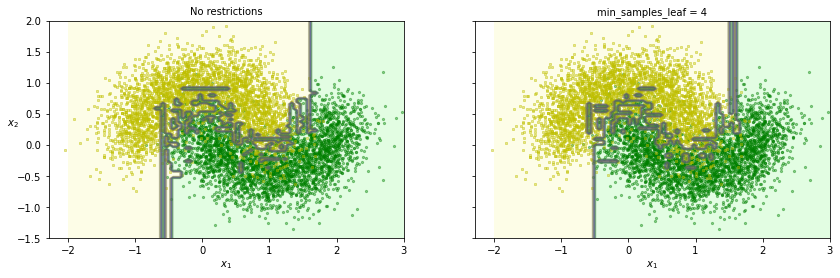

In [14]:
# 규제가 없는 모델과 리프노드가 최소한 4개이상의 샘플을 가져야 한다는 규제조건이 있는 모델의 비교 

from sklearn.tree import DecisionTreeClassifier

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
tree_clf1.fit(X_train, y_train)
tree_clf2.fit(X_train, y_train)

fig, axes = plt.subplots(ncols=2, figsize=(14, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_train, y_train, axes=[-2, 3, -1.5, 2])
plt.title("No restrictions", fontsize=10)
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_train, y_train, axes=[-2, 3, -1.5, 2])
plt.title("min_samples_leaf = {}".format(tree_clf2.min_samples_leaf), fontsize=10)
plt.ylabel("")

In [15]:
# 테스트 데이터셋에 대한 정확도 

from sklearn.metrics import accuracy_score

y_pred_t1 = tree_clf1.predict(X_train)
y_pred_t2 = tree_clf2.predict(X_train)
y_pred1 = tree_clf1.predict(X_test)
y_pred2 = tree_clf2.predict(X_test)

print(f"규제가 없는 결정트리 훈련 데이터셋 정확도:{accuracy_score(y_train, y_pred_t1)}")
print(f"규제가 있는 결정트리 훈련 데이터셋 정확도:{accuracy_score(y_train, y_pred_t2)}\n")
print(f"규제가 없는 결정트리 테스트 데이터셋 정확도:{accuracy_score(y_test, y_pred1)}")
print(f"규제가 있는 결정트리 테스트 데이터셋 정확도:{accuracy_score(y_test, y_pred2)}")

규제가 없는 결정트리 훈련 데이터셋 정확도:1.0
규제가 있는 결정트리 훈련 데이터셋 정확도:0.9472857142857143

규제가 없는 결정트리 테스트 데이터셋 정확도:0.8836666666666667
규제가 있는 결정트리 테스트 데이터셋 정확도:0.888


## `GridSearchCV`를 이용하여 교차검증으로 적절한 하이퍼파라미터 선택 

> * `sklearn.model_selection` 모듈의 `GridSearchCV` 클래스 ([API](`https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearch#sklearn.model_selection.GridSearchCV))  
$$ $$
> * `GridSearchCV`의 객체를 생성할 때 `cv=k`로 설정하면 k겹 교차검증을 통해 좋은 하이퍼파라미터를 선택 
$$ $$
> * 최종으로 찾은 하이퍼파라미터와 <span style="color:blue">전체 데이터셋을 이용</span>하여 학습한 예측기를 구해줌 : 객체의 `best_estimator_`속성을 통해 접근  
>> * 가장 좋은 하이퍼파라미터는 객체의 `best_params_`를 통해 접근  
>> * 기타 사항은 API 참고 

In [16]:
# 격자탐색(grid search)를 이용한 교차검증을 통해 규제 파라미터 max_leaf_nodes, min_samples_leaf를 선택 

from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_leaf': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3, n_jobs=-1)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    6.2s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_leaf': [2, 3, 4]},
             verbose=1)

In [17]:
grid_search_cv.best_params_

{'max_leaf_nodes': 29, 'min_samples_leaf': 2}

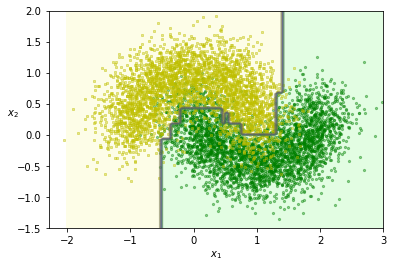

In [18]:
best_clf = grid_search_cv.best_estimator_

plot_decision_boundary(best_clf, X_train, y_train, axes=[-2, 3, -1.5, 2])

In [19]:
y_pred_t3 = best_clf.predict(X_train)
y_pred3 = best_clf.predict(X_test)

print(f"격자탐색 결정트리 훈련 데이터셋 정확도:{accuracy_score(y_train, y_pred_t3)}\n")
print(f"격자탐색 결정트리 테스트 데이터셋 정확도:{accuracy_score(y_test, y_pred3)}")

격자탐색 결정트리 훈련 데이터셋 정확도:0.9211428571428572

격자탐색 결정트리 테스트 데이터셋 정확도:0.9156666666666666


### 4.2 램덤포레스트 모델의 기본적인 아이디어  

> * 일반적인 앙상블 모델에 관심이 있거나 좀 더 공부하기를 원하는 경우 다음 링크를 참고 ([앙상블 모델](https://scikit-learn.org/stable/modules/ensemble.html#)) 

> * 사이킷런에 구현되어 있는 램덤포레스트 모델은 `sklearn.ensemble` 모듈의 다음 클래스  
>> * `RandomForestClassifier` 클래스([API](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforest#sklearn.ensemble.RandomForestClassifier))  
>> * `RandomForestRegressor` 클래스 ([API](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=randomforestregressor#sklearn.ensemble.RandomForestRegressor))  

> * 기본적인 아이디어   
>> * 성능이 좋지 않은 예측기를 여러 개 만들고,  
>>> * 분류의 경우에는 각 예측기에서 가장 많이 예측된 값으로 예측  
>>> * 회귀의 경우에는 각 예측기의 평균으로 예측  

#### 랜덤포레스트 기본 구현 

> (1) `sklearn.model_selection` 모듈의 `ShuffleSplit`([API](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html?highlight=shufflesplit#sklearn.model_selection.ShuffleSplit))를 이용하여, 무작위로 선택된 100개의 샘플을 각각 갖는 훈련 세트의 서브셋을 1,000개 생성  

> (2) 격자탐색을 통해 찾은 하이퍼파라미터를 이용하여 생성한 결정트리 예측기(4.1에서 구한 `best_clf`이용)를 훈련 세트의 각 서브셋으로 학습시켜 1000개의 약한 분류기를 생성  

> (3) 각 테스트 세트 샘플에 대해 1,000개의 결정 트리 예측을 만들고 다수로 나온 예측을 반환하는 예측기 생성 (`scipy.stats` 모듈의 `mode()` 함수 이용)

> (4) 랜덤포레스트 (약한 분류기에 대한 다수 결정) 예측에 대한 정확도 비교 

In [4]:
# 랜덤포레스트 기본 구현 (1)
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

result_split = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in result_split.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

    
    
# 랜덤포레스트 기본 구현 (2) 
from sklearn.base import clone

forest = [clone(best_clf) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

print(f"1000개의 약한 학습기에 대한 정확도 평균:{np.mean(accuracy_scores)}\n") 



# 랜덤포레스트 기본 구현 (3) 
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)
    
from scipy.stats import mode

y_pred_votes, n_votes = mode(Y_pred, axis=0)




# 랜덤포레스트 기본 구현 (4) 

print(f"격자탐색 결정트리의 테스트 데이터셋 예측 정확도: {accuracy_score(y_test, y_pred3)}")
print(f"랜덤포레스트의 테스트 데이터셋 예측 정확도: {accuracy_score(y_test, y_pred_votes.reshape([-1]))}")

NameError: name 'best_clf' is not defined

### 4.3 회귀 문제에 대한 결정트리 모델 

* 잡음이 있는 이차식 데이터셋에 대한 결정트리 회귀 모델  

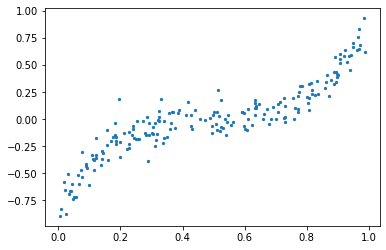

In [21]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 7 * (X - 0.5) ** 3
y = y + np.random.randn(m, 1) / 10

plt.scatter(X, y, marker="o", s=5)

In [22]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_reg_pred(tree_reg, X, y, axes=[0, 1, -1, 1], ylabel=None, title=None):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=10)
    if ylabel:
        plt.ylabel(ylabel, fontsize=10, rotation=0)
    plt.plot(X, y, "b.", alpha=0.6)
    plt.plot(x1, y_pred, "r-", linewidth=1, label=r"$\hat{y}$")
    plt.legend(loc="upper center", fontsize=10)
    plt.title(title)

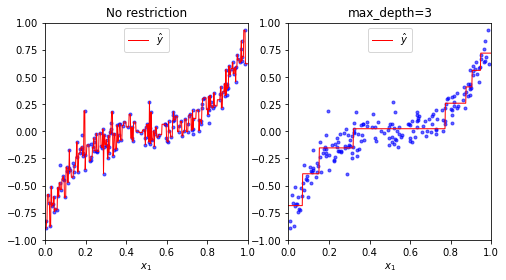

In [23]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_reg_pred(tree_reg1, X, y, title="No restriction")
plt.subplot(122)
plot_reg_pred(tree_reg2, X, y, title="max_depth=3")

## 이론 연습문제 

1) 분할영역 $\mathcal R_i$에 대한 지니 불순도는 이 영역에 속하는 훈련샘플 두 개를 복원추출로 뽑을 때, 두 샘플의 레이블이 다를 확률을 구하는 것임을 보이시오.  
> 풀이: $$\text{IP}(\mathcal R_j)=\sum_{k=1}^K\sum_{1\le l\neq k\le K}p_kp_l=\sum_{k=1}^Kp_k(1-p_k)=1-\sum_{k=1}^K p_k^2$$

2) 레이블이 $0$과 $1$인 이진분류 문제에서 분할영역 $\mathcal R_j$에 속하는 샘플의 레이블이 $1$이 될 확률이 $p$라 하고, 오분류 불순도, 엔트로피 불순도, 지니 불순도를 $p\, (0\le p \le 1)$에 대한 함수로 이해할 때, 세 함수의 그래프를 그리고 비교하여 보시오. 

3) 함수 $f:\mathbb R\to \mathbb R$에 대해 잡음이 섞인 데이터셋 $\{(x_i,y_i)|1\le i \le 1000\}$개가 주어졌다. 이 데이터를 이용하여 결정트리 회귀모델을 만들 때, depth가 $n$ 이하가 되도록 규제를 가한다면 서로 다른 상수값을 갖는 구간은 최대 몇 개 나올 수 있는가? 

4) 십만 개의 샘플을 가진 훈련 데이터셋에서 규제 없이 훈련시킨 결정트리의 깊이는 대략 얼마가 되는가? 

5) 결정트리가 훈련 데이터셋에 과대적합되었다면 허용하는 최대 깊이(depth)를 어떻게 조절하는 것이 좋은가?  

6) 백만 개의 샘플을 가진 훈련 데이터셋에 결정트리를 훈련시키는 데 한 시간이 걸렸다면, 같은 특성을 갖는 천만 개의 샘플을 이용하여 훈련시키는 데는 대략 어느 정도가 걸리는가? 

## 코드 연습문제 

1) `sklearn.tree` 모듈의 `DecisionTreeRegressor`의 ([API](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor))를 보고, 객체를 생성할 때 설정할 수 있는 하이퍼파라미터들의 의미와 사용법을 익히시오.  

2) 위의 `4.2 회귀 문제에 대한 결정트리 모델` 코드를 `DecisionTreeRegressor`의 [API]와 비교하며 이해하시오. 

3) 위의 `4.2 회귀 문제에 대한 결정트리 모델`에서 규제 조건으로 `max_depth`와 `min_samples_leaf`를 동시에 사용하여 좋은 예측기를 만들기 위해, `GridSearchCV`를 이용하여 적절한 `max_depth`, `min_samples_leaf`값을 격자탐색을 통해 찾고, 이를 이용한 예측기를 만드시오. 

4) 위 설명 내용 중 랜덤포레스트의 기본적인 구현과 관련된 코드를 익히시오. 
 
5) [선택사항] `sklearn.tree` 모듈의 `export_graphviz`([API](https://scikit-learn.org/stable/search.html?q=export_graphviz)) 함수와 `export_text`([API](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html?highlight=export_text#sklearn.tree.export_text))함수를 이용하면,   
아래의 `그림 생성 코드`에서 보듯이, 결정트리 분류기를 텍스트 형태의 수형도로 나타낼 수 있다. 아래 코드와 각 함수에 대한 [API]를 통해 사용법을 익히고 활용하시오.  
> * 아래 `그림생성 코드`에서처럼 그림으로 트리구조를 생성하고 싶다면, 파이썬과 무관하게 수업자료에 올려준 `graphviz-2.38.msi`를 다운로드하여 설치한 다음, 시스템 환경변수 path에 "C:\Program Files (x86)\Graphviz2.38\bin\dot.exe"와 같은 형태(설치 위치에 따라 달라짐)로 "dot.exe"의 위치를 추가해주면 아래 코드와 같은 방법으로 사용 가능

## [선택 사항] 그림생성 코드

In [24]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [25]:
import os
from subprocess import call 
from IPython import display
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

export_graphviz(
        tree_clf,
        feature_names=iris.feature_names[2:],
        out_file = os.path.join('.',"iris_tree.dot"),
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

tree_res = export_text(
        tree_clf,
        feature_names=iris.feature_names[2:],
    )

In [26]:
call(['dot', '-Tpng', u'C:/Users/Kil-Chan Ha/Documents/ML2020/iris_tree.dot', '-o', 'C:/Users/Kil-Chan Ha/Documents/ML2020/iris_tree.png', '-Gdpi=600'])

0

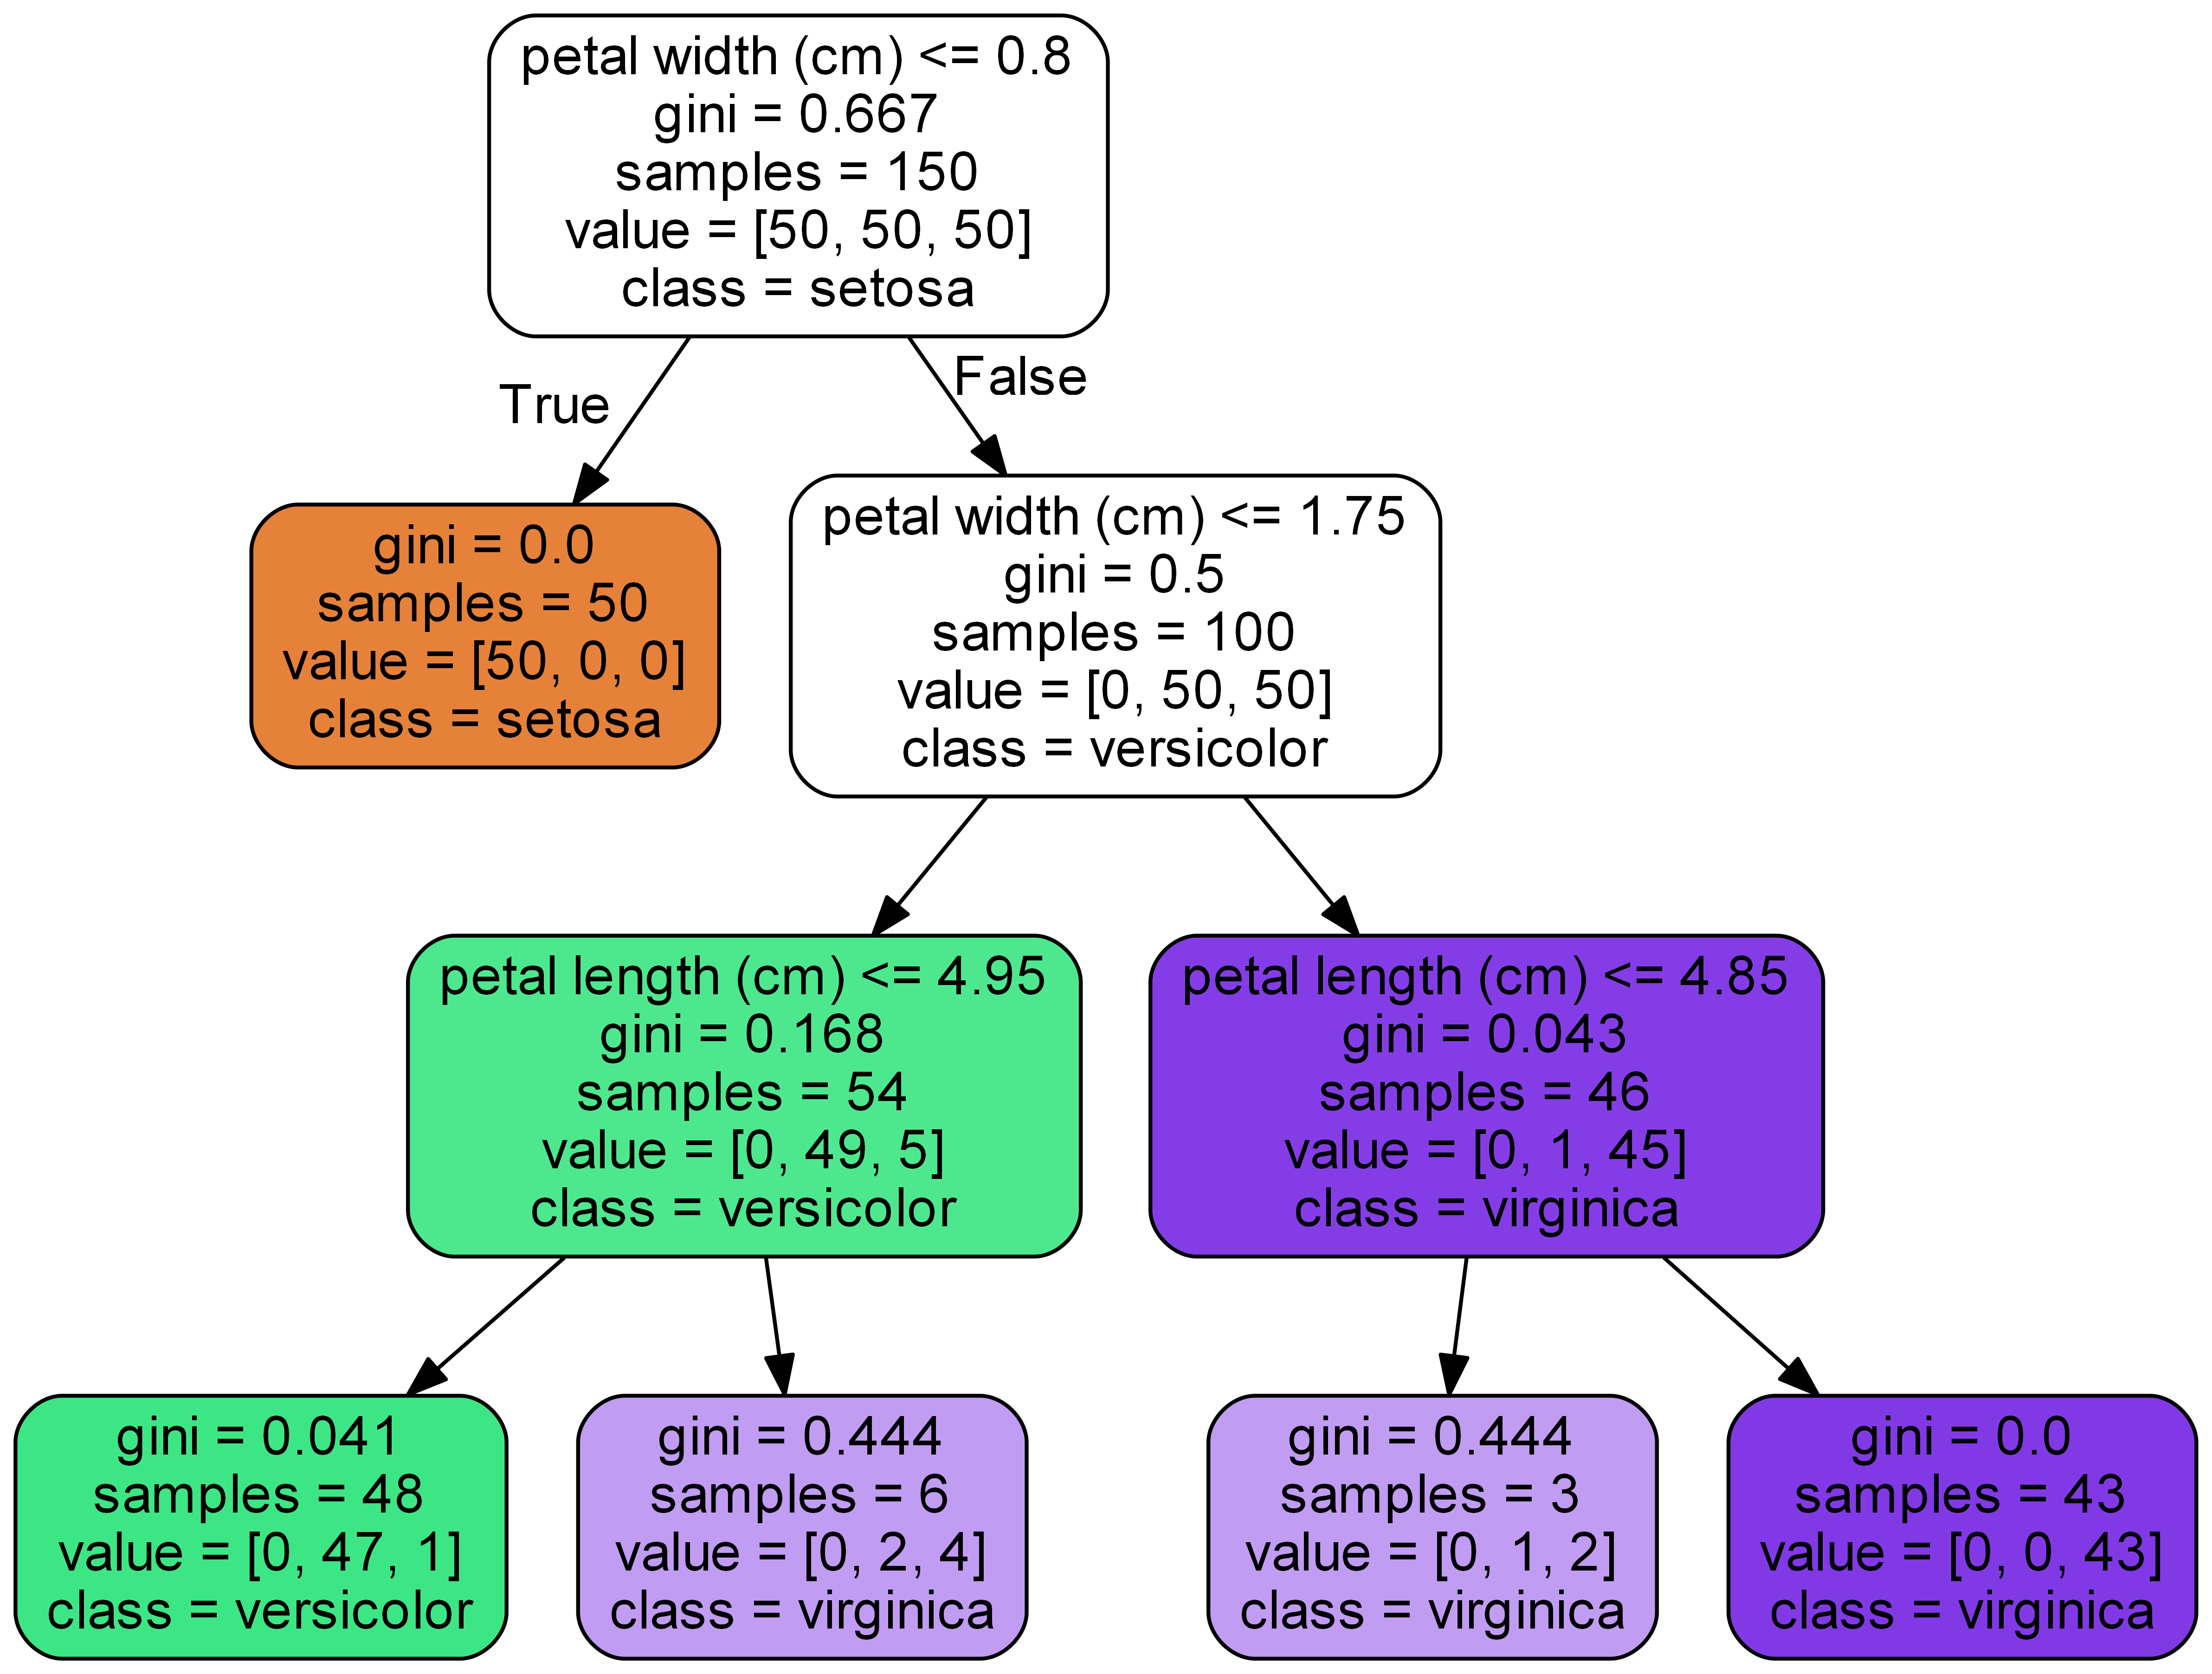

In [27]:
display.Image("iris_tree.png", width=400)

In [28]:
print(tree_res)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2

